In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature selection & modeling (for later stages too)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Saving model later (Week 5+)
import joblib



In [73]:
data= pd.read_csv("air_quality_health_impact_data.csv") 

In [74]:
data.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [75]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [76]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [77]:
print(data.describe())

          RecordID          AQI         PM10        PM2_5          NO2  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean   2906.000000   248.438476   148.654997   100.223714   102.293445   
std    1677.635538   144.777638    85.698500    58.096612    57.713175   
min       1.000000     0.005817     0.015848     0.031549     0.009625   
25%    1453.500000   122.951293    75.374954    49.435171    53.538538   
50%    2906.000000   249.127841   147.634997   100.506337   102.987736   
75%    4358.500000   373.630668   222.436759   151.340260   151.658516   
max    5811.000000   499.858837   299.901962   199.984965   199.980195   

               SO2           O3  Temperature     Humidity    WindSpeed  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean     49.456838   149.312431    14.975500    54.776853     9.989177   
std      28.530329    86.534240    14.483067    26.020786     5.776950   
min       0.011023     0.001661    -9

In [78]:
print(data.isnull().sum())

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


In [79]:
data.shape

(5811, 15)

In [80]:
data.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

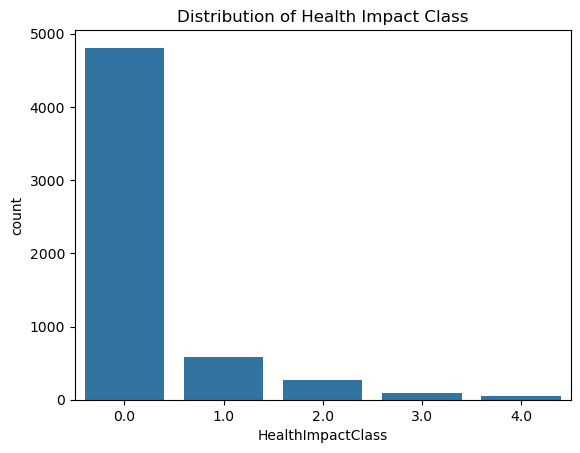

In [81]:
#univariate analysis

sns.countplot(x='HealthImpactClass', data=data)
plt.title('Distribution of Health Impact Class')
plt.show()

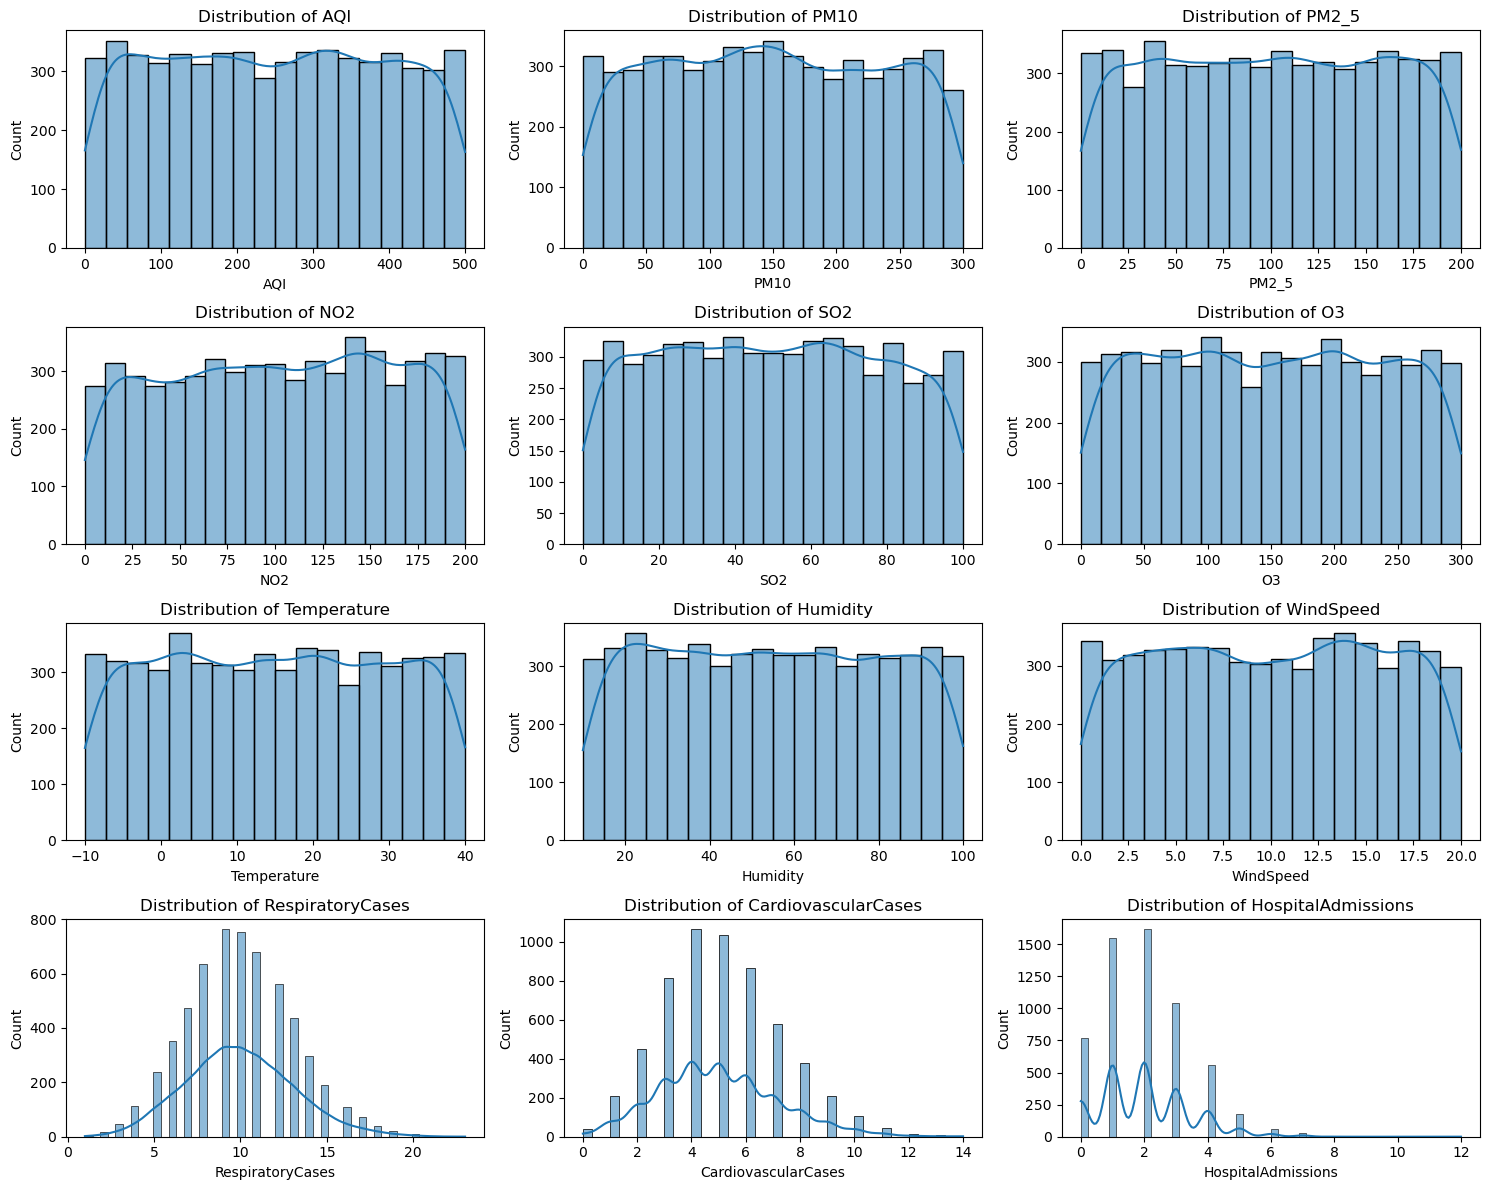

In [58]:
# Distribution of numerical features
num_cols = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3',
            'Temperature', 'Humidity', 'WindSpeed',
            'RespiratoryCases', 'CardiovascularCases',
            'HospitalAdmissions', 'HealthImpactScore']

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


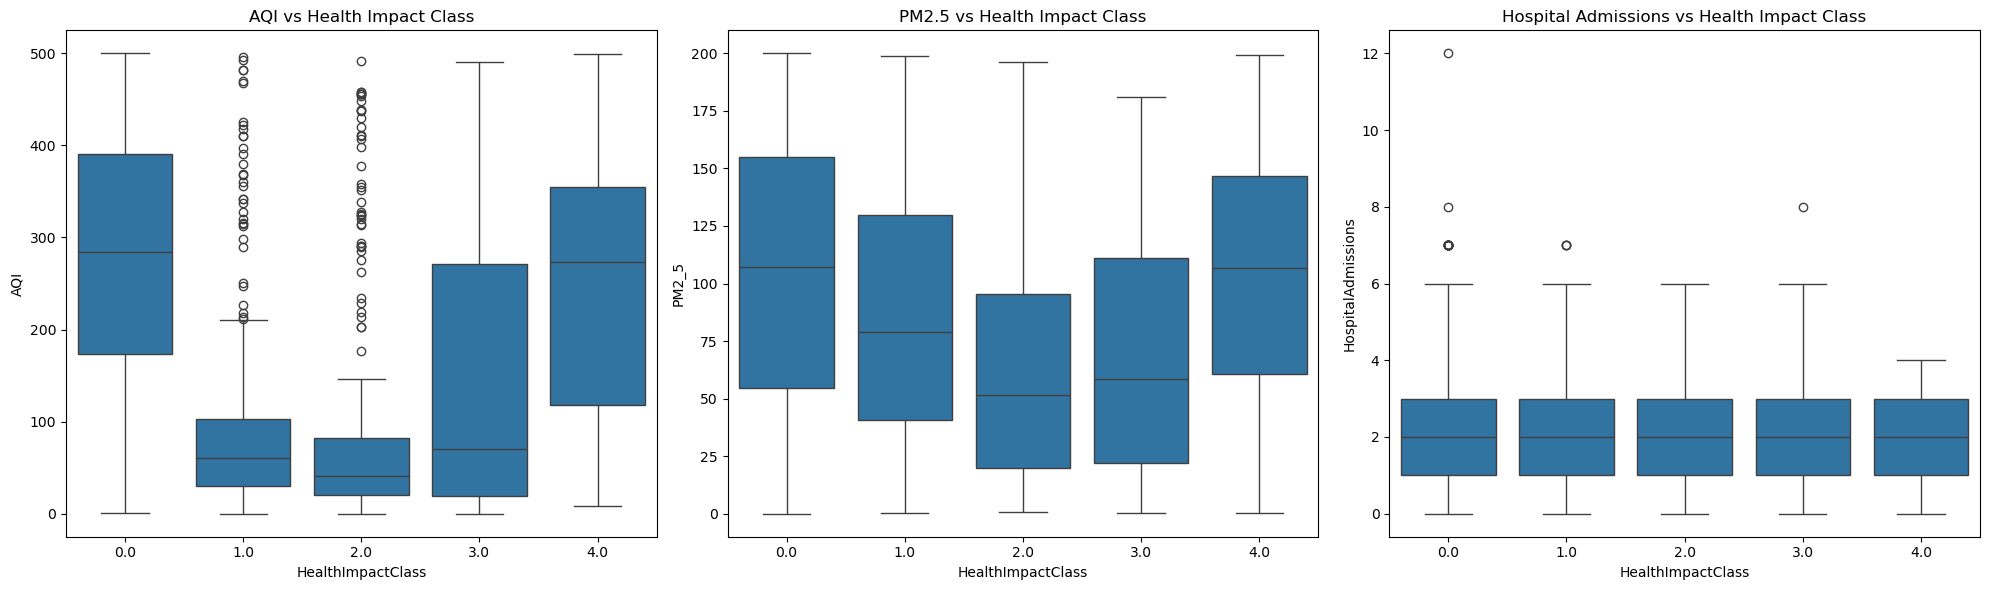

In [59]:

# Step 3: Bivariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# 1. AQI vs Health Impact Class
sns.boxplot(x='HealthImpactClass', y='AQI', data=data, ax=axes[0]).set_title('AQI vs Health Impact Class')

# 2. PM2.5 vs Health Impact Class
sns.boxplot(x='HealthImpactClass', y='PM2_5', data=data, ax=axes[1]).set_title('PM2.5 vs Health Impact Class')

# 3. Hospital Admissions vs Health Impact Class
sns.boxplot(x='HealthImpactClass', y='HospitalAdmissions', data=data, ax=axes[2]).set_title('Hospital Admissions vs Health Impact Class')

plt.tight_layout()
plt.show()


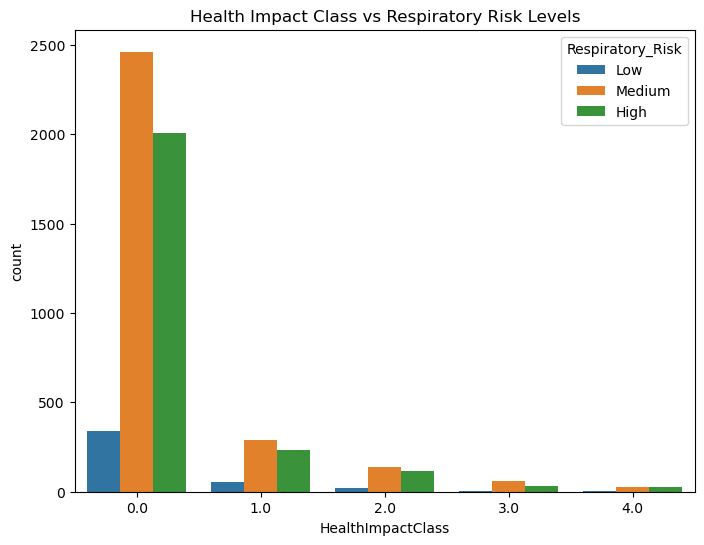

In [60]:

data['Respiratory_Risk'] = pd.cut(data['RespiratoryCases'],
                                bins=[0, 5, 10, 20],
                                labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8,6))
sns.countplot(x='HealthImpactClass', hue='Respiratory_Risk', data=data)
plt.title('Health Impact Class vs Respiratory Risk Levels')
plt.show()

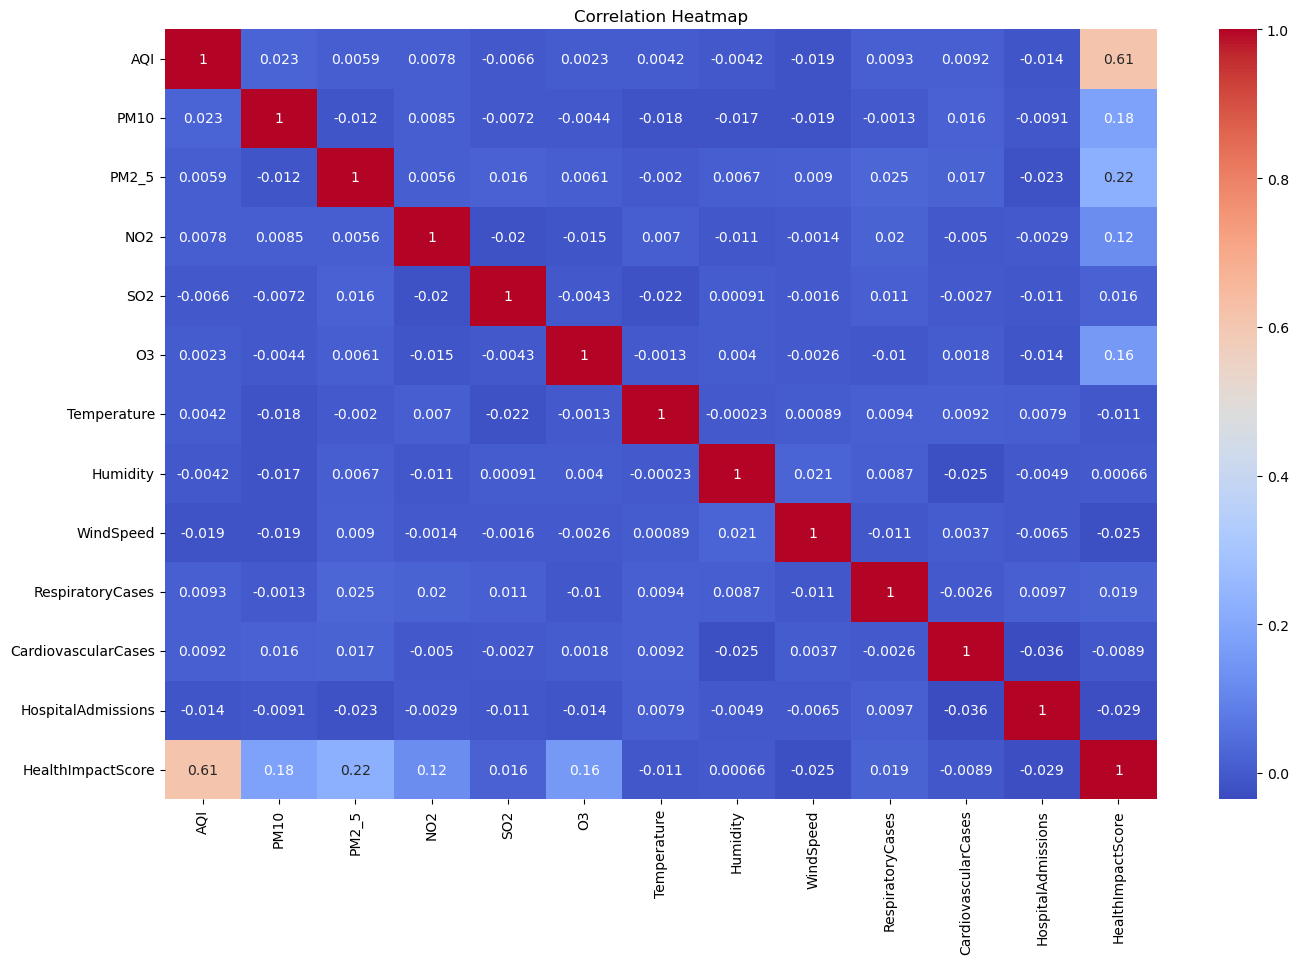

In [61]:
# Correlation heatmap

plt.figure(figsize=(16, 10)) 
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

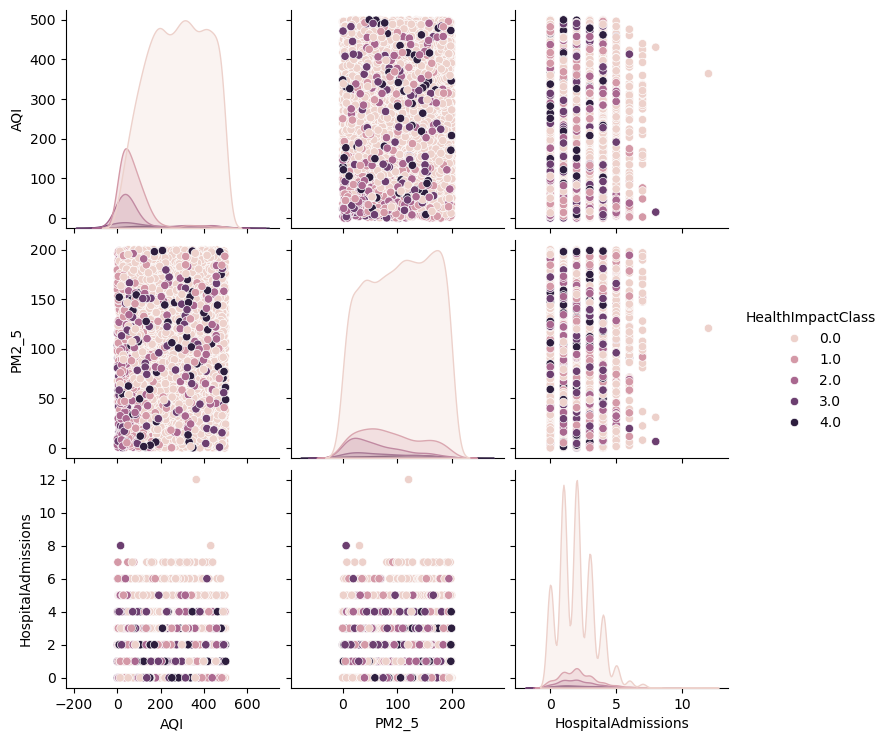

In [62]:
selected_cols = ['AQI', 'PM2_5', 'HospitalAdmissions']
sns.pairplot(data[selected_cols + ['HealthImpactClass']], hue='HealthImpactClass', diag_kind='kde')
plt.show()

In [63]:
# List of categorical columns to encode
categorical_cols = ['City', 'Vehicle Type', 'Weather', 'Economic Condition', 
                    'Day Of Week', 'Traffic Density']

# Apply Label Encoding if column exists
le = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

# Convert boolean columns to int if they exist
for col in ['Is Peak Hour', 'Random Event Occurred']:
    if col in data.columns:
        data[col] = data[col].astype(int)

In [64]:
#Feature Engineering
pollutants = ['PM10', 'PM2_5', 'NO2', 'SO2', 'O3']
existing_pollutants = [c for c in pollutants if c in data.columns]
if existing_pollutants:
    data['AirPollutionIndex'] = data[existing_pollutants].mean(axis=1)

# 2️⃣ Temperature-Humidity Index
if 'Temperature' in data.columns and 'Humidity' in data.columns:
    data['TempHumidityIndex'] = data['Temperature'] * data['Humidity'] / 100

# 3️⃣ Peak Traffic Indicator
if 'Is Peak Hour' in data.columns and 'Traffic Density' in data.columns:
    data['PeakTraffic'] = data['Is Peak Hour'] * data['Traffic Density']

data.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass,Respiratory_Risk,AirPollutionIndex,TempHumidityIndex
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0,Medium,87.263258,4.348137
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0,Medium,106.535755,0.723095
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0,High,46.150997,0.208250
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0,Medium,51.602612,21.809812
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0,Medium,124.599211,2.295792


In [65]:
Q1 = data['AQI'].quantile(0.25)
Q3 = data['AQI'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['AQI'] >= Q1 - 1.5*IQR) & (data['AQI'] <= Q3 + 1.5*IQR)]


In [66]:
data.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
Respiratory_Risk       6
AirPollutionIndex      0
TempHumidityIndex      0
dtype: int64

In [67]:
# Features and target
X = data.drop('HealthImpactClass', axis=1)
y = data['HealthImpactClass']



In [68]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4648, 17)
Test shape: (1163, 17)


In [69]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [70]:
X_train

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,Respiratory_Risk,AirPollutionIndex,TempHumidityIndex
2495,2496,-0.020771,-1.119619,-1.499145,1.368147,1.233491,1.386021,-0.584249,0.568073,0.295681,0.329672,-0.448282,0.716536,0.459699,High,120.645220,4.505185
2451,2452,1.622817,0.906953,1.473805,0.309634,-1.060377,-0.860017,-1.262701,1.659192,-0.829224,-0.312539,0.005961,-0.705522,0.459699,Medium,126.041664,-3.299446
5206,5207,1.052259,1.511186,-1.350518,-1.374330,-0.420851,-1.680576,1.526633,-0.530631,1.247335,-0.633644,0.914449,0.716536,0.459699,Medium,73.541167,15.218554
3666,3667,1.181710,1.332866,0.737357,0.427872,1.148118,-0.027566,-1.450507,0.528024,-1.652707,0.329672,0.460205,0.005507,0.459699,High,153.157604,-4.176453
3362,3363,0.672708,-1.478003,0.889665,0.929296,0.307154,1.012031,1.242332,-1.201994,0.326433,0.650777,-1.356770,-0.705522,0.459699,High,125.563126,7.771486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3773,-0.535135,-1.275822,1.435833,-1.471570,0.714218,-0.134880,-0.498649,-0.516310,-0.140163,-1.918065,0.914449,-1.416551,0.459699,Low,90.299090,3.194076
5191,5192,0.702000,0.322651,-0.438751,-1.545260,1.627434,0.491838,-1.301943,-1.224411,-1.562224,0.008566,0.005961,0.005507,0.459699,Medium,111.048246,-0.905129
5226,5227,0.294646,-0.853972,-0.593574,-0.200149,0.036931,-1.505541,-0.963763,0.092689,0.103448,0.008566,0.914449,0.716536,0.459699,Medium,60.965998,0.554217
5390,5391,-1.244124,-0.382090,0.370778,0.812072,-1.266051,1.317170,-1.074233,-0.638864,-0.266828,-1.918065,2.277181,-0.705522,0.356329,Low,133.187176,-0.242322


In [71]:
print(X_train.isnull().sum())

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
Respiratory_Risk       6
AirPollutionIndex      0
TempHumidityIndex      0
dtype: int64


In [82]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [83]:
X_train


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,Respiratory_Risk,AirPollutionIndex,TempHumidityIndex
2495,2496,-0.020771,-1.119619,-1.499145,1.368147,1.233491,1.386021,-0.584249,0.568073,0.295681,0.329672,-0.448282,0.716536,0.459699,High,120.645220,4.505185
2451,2452,1.622817,0.906953,1.473805,0.309634,-1.060377,-0.860017,-1.262701,1.659192,-0.829224,-0.312539,0.005961,-0.705522,0.459699,Medium,126.041664,-3.299446
5206,5207,1.052259,1.511186,-1.350518,-1.374330,-0.420851,-1.680576,1.526633,-0.530631,1.247335,-0.633644,0.914449,0.716536,0.459699,Medium,73.541167,15.218554
3666,3667,1.181710,1.332866,0.737357,0.427872,1.148118,-0.027566,-1.450507,0.528024,-1.652707,0.329672,0.460205,0.005507,0.459699,High,153.157604,-4.176453
3362,3363,0.672708,-1.478003,0.889665,0.929296,0.307154,1.012031,1.242332,-1.201994,0.326433,0.650777,-1.356770,-0.705522,0.459699,High,125.563126,7.771486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3773,-0.535135,-1.275822,1.435833,-1.471570,0.714218,-0.134880,-0.498649,-0.516310,-0.140163,-1.918065,0.914449,-1.416551,0.459699,Low,90.299090,3.194076
5191,5192,0.702000,0.322651,-0.438751,-1.545260,1.627434,0.491838,-1.301943,-1.224411,-1.562224,0.008566,0.005961,0.005507,0.459699,Medium,111.048246,-0.905129
5226,5227,0.294646,-0.853972,-0.593574,-0.200149,0.036931,-1.505541,-0.963763,0.092689,0.103448,0.008566,0.914449,0.716536,0.459699,Medium,60.965998,0.554217
5390,5391,-1.244124,-0.382090,0.370778,0.812072,-1.266051,1.317170,-1.074233,-0.638864,-0.266828,-1.918065,2.277181,-0.705522,0.356329,Low,133.187176,-0.242322
